# Statistical analysis between coastal and adjacent ocean cells in around Tasmania

## Importing packages

In [1]:
from datetime import date 
from datetime import datetime
import glob
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import scipy.ndimage as ndimage
from scipy.ndimage import convolve
from scipy.ndimage.measurements import label, find_objects
import xarray as xr

## Opening the mask file

In [2]:
ds = xr.open_dataset('/g/data/e14/cp3790/Charuni/static_era5.nc').sel(longitude=slice(144.0, 149.0), latitude=slice(-39.0, -44.0))
mask = xr.where(ds.lsm==0, 0, 1)
mask

<xarray.DataArray 'lsm' (time: 1, latitude: 21, longitude: 21)>
array([[[1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
        [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
        [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
        [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0],
        [1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0],
        [0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0],
        [0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
        [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
        [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
        [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
        [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
        [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
        [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
        [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
        [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]])
Coordinates:
  * longitude  (longitude) float32 144.0 144.25 144.5 ... 148.5 148.75 149.0
  * latitude   (latitude) float32 -39.0 -39.25 -39.5 ... -43.5 -43.75 -44.0
  * time       (time) datetime64[ns] 2000-01-01

## Finding coastal cells
Using scipy.ndimage convolve

k is an array of weights, with the same number of dimensions as input

In [3]:
k =([[[1, 1, 1],
    [1, 0, 1],
    [1, 1, 1]]])

input array 'mask' is convolved with 'k', mode='constant' which ensures that the input is extended by filling all values beyond the edge with the same constant value

In [4]:
c = convolve(mask, k, mode='constant')

In [5]:
c

array([[[1, 2, 0, 0, 0, 0, 1, 2, 4, 5, 5, 5, 5, 4, 4, 3, 3, 2, 1, 0, 0],
        [3, 4, 1, 0, 0, 0, 1, 3, 4, 6, 7, 8, 8, 7, 6, 5, 5, 3, 2, 0, 0],
        [4, 4, 2, 0, 0, 0, 0, 1, 2, 5, 6, 8, 8, 8, 8, 8, 8, 5, 3, 0, 0],
        [5, 5, 3, 0, 0, 0, 0, 0, 0, 2, 3, 5, 5, 6, 7, 8, 8, 6, 4, 1, 0],
        [4, 5, 4, 3, 3, 2, 1, 0, 0, 1, 2, 3, 3, 4, 5, 7, 8, 7, 4, 2, 0],
        [2, 5, 4, 5, 5, 3, 2, 0, 0, 0, 0, 0, 0, 1, 4, 6, 8, 8, 5, 3, 0],
        [1, 4, 5, 8, 8, 6, 5, 2, 1, 0, 1, 2, 3, 3, 5, 6, 8, 8, 5, 3, 0],
        [0, 3, 5, 8, 8, 7, 6, 4, 4, 3, 4, 4, 5, 5, 6, 7, 8, 8, 5, 3, 0],
        [0, 3, 5, 8, 8, 8, 8, 7, 6, 5, 6, 7, 8, 8, 8, 8, 8, 8, 5, 3, 0],
        [0, 3, 5, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 5, 3, 0],
        [0, 2, 4, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 5, 3, 0],
        [0, 1, 4, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 5, 3, 0],
        [0, 0, 2, 4, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 4, 1],
        [0, 0, 1, 4, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 

coastal array is 1 when the mask==1 and the sum of neighbouring cells is < 8 (which means at least one cell is neighbouring a 0 (or sea grid cell)

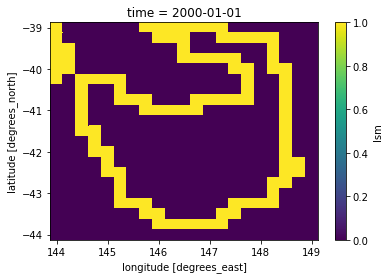

In [6]:
coastal = np.logical_and(mask == 1, c < 8)
coastal.astype(int).plot()

In [7]:
def fix(ds):
    # This function makes the original data array repeatable so that it matches with the shape of the other data array.

    trial = ds
    i = 0
    while i < 13514:  # <-- Here, 13514 corresponds to the timesteps in land dataset 
        trial = xr.concat([trial, ds], 'time')
        i+=1
    trial = trial.isel(time = slice(0,13514))
    # to specify the dates/time 
    trial.coords['time'] = np.arange(date(1982,1,1).toordinal(),date(2018,12,31).toordinal()+1) 
    
    t = np.arange(date(1982,1,1).toordinal(),date(2018,12,31).toordinal()+1)
    dates = [date.fromordinal(tt.astype(int)) for tt in t]
    
    trial.coords['time'] = dates

    return trial

In [8]:
new_coastal = fix(coastal)  # new_coastal will now have the same shape as anom 

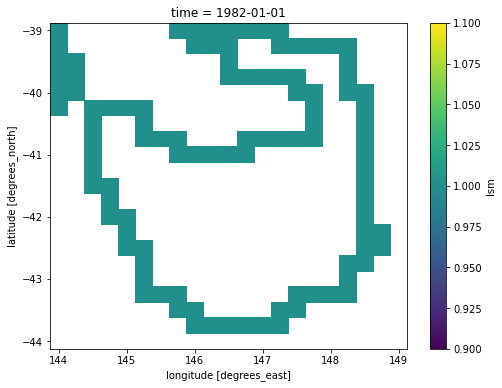

In [9]:
coast_grids = new_coastal.where(new_coastal != 0)
coast_grids
coast_grids.isel(time=0).plot(figsize=(8,6))

#plt.savefig('tasmania-coastal-cells')

In [10]:
coast_grids

<xarray.DataArray 'lsm' (time: 13514, latitude: 21, longitude: 21)>
array([[[ 1., nan, nan, ..., nan, nan, nan],
        [ 1., nan, nan, ..., nan, nan, nan],
        [ 1.,  1., nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 1., nan, nan, ..., nan, nan, nan],
        [ 1., nan, nan, ..., nan, nan, nan],
        [ 1.,  1., nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 1., nan, nan, ..., nan, nan, nan],
        [ 1., nan, nan, ..., nan, nan, nan],
        [ 1.,  1., nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[ 1., nan, nan, ..., nan, nan, nan],
        [ 1., nan, nan, ..., nan, nan, nan],
        [ 1.,  1., nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 1., nan, nan, ..., nan, nan, nan],
        [ 1., nan, nan, ..., nan, nan, nan],
        [ 1.,  1., nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 1., nan, nan, ..., nan, nan, nan],
        [ 1., nan, nan, ..., nan, nan, nan],
        [ 1.,  1., nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * latitude   (latitude) float32 -39.0 -39.25 -39.5 ... -43.5 -43.75 -44.0
  * longitude  (longitude) float32 144.0 144.25 144.5 ... 148.5 148.75 149.0
  * time       (time) object 1982-01-01 1982-01-02 ... 2018-12-30 2018-12-31

In [11]:
coast_sel_stacked = coast_grids.stack(latlon=('latitude', 'longitude')).dropna(dim='latlon')
# this stacks all lat, lon pairs corresponding to the coastal cells 

In [12]:
coast_sel_stacked

<xarray.DataArray 'lsm' (time: 13514, latlon: 102)>
array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])
Coordinates:
  * time       (time) object 1982-01-01 1982-01-02 ... 2018-12-30 2018-12-31
  * latlon     (latlon) MultiIndex
  - latitude   (latlon) float64 -39.0 -39.0 -39.0 -39.0 ... -43.75 -43.75 -43.75
  - longitude  (latlon) float64 144.0 145.8 146.0 146.2 ... 146.8 147.0 147.2

## Anomaly datasets

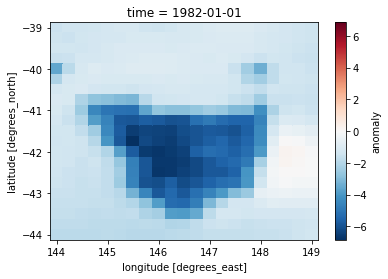

In [13]:
# surface air temperature anomalies
tasa = xr.open_dataset('/g/data/e14/cp3790/Charuni/surface_air_temp_anomaly.nc').sel(time=slice('1982', '2018'), longitude=slice(144.0, 149.0), latitude=slice(-39.0, -44.0))
anom = tasa.anomaly
anom.isel(time=0).plot()

In [14]:
# sea surface temperature anomalies 
files = sorted(glob.glob('/g/data/e14/cp3790/Charuni/MHW-sev/mhw_severity.pc90.*.nc'))
mhw = xr.open_mfdataset(files, combine='by_coords').sel(time=slice('1982', '2018'), lon=slice(144.0, 149.0), lat=slice(-44.0, -39.0))

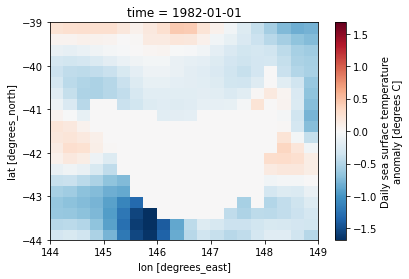

In [15]:
ssta = mhw.ssta
ssta.isel(time=0).plot()

Using the stacked latlon locations of coastal cells to find the location of the neighbouring cells in the ssta dataset, which I now call 'localcells'

In [16]:
# the ssta dataset has a resolution of 0.25 degrees; plus/minus 0.3 ensures that the selections overlaps, accounting for
# any shift between the two grids 

for (lat, lon) in coast_sel_stacked.latlon.values:
    centre = ssta.sel(lat=lat, lon=lon, method='nearest')
    centre_lat = centre.lat.values
    centre_lon = centre.lon.values
    localcells = ssta.sel(lat=slice(centre_lat-0.3,centre_lat+0.3), lon=slice(centre_lon-0.3,centre_lon+0.3))
   

In [17]:
localcells

<xarray.DataArray 'ssta' (time: 13514, lat: 3, lon: 3)>
dask.array<getitem, shape=(13514, 3, 3), dtype=float32, chunksize=(13514, 3, 3), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -43.88 -43.62 -43.38
  * time     (time) datetime64[ns] 1982-01-01 1982-01-02 ... 2018-12-31
  * lon      (lon) float64 147.1 147.4 147.6
Attributes:
    units:      degrees C
    long_name:  Daily sea surface temperature anomaly

Using the stacked latlon locations of coastal cells to find the location of the corresponding cells in the (land) anom dataset, which I now call 'landcells'

In [18]:
for (lat, lon) in coast_sel_stacked.latlon.values:
    centre = tasa.sel(latitude=lat, longitude=lon, method='nearest')
    centre_lat = centre.latitude.values
    centre_lon = centre.longitude.values
    landcells = anom.sel(latitude=centre_lat, longitude=centre_lon)
    

In [19]:
landcells

<xarray.DataArray 'anomaly' (time: 13514)>
array([-1.436407, -1.362972, -2.416676, ...,  0.605232,  1.60314 ,  2.046251],
      dtype=float32)
Coordinates:
    longitude  float32 147.25
    latitude   float32 -43.75
  * time       (time) datetime64[ns] 1982-01-01 1982-01-02 ... 2018-12-31

In [20]:
# Creating data arrays for all land cells and corresponding local cells. 

series1 = []
series2 = []
for (lat, lon) in coast_sel_stacked.latlon.values:
    cen = anom.sel(latitude=lat, longitude=lon, method='nearest')
    cen_lat = cen.latitude.values
    cen_lon = cen.longitude.values
    landcells = anom.sel(latitude=cen_lat, longitude=cen_lon)
    centre = ssta.sel(lat=lat, lon=lon, method='nearest')
    centre_lat = centre.lat.values
    centre_lon = centre.lon.values
    localcells = ssta.sel(lat=slice(centre_lat-0.3,centre_lat+0.3), lon=slice(centre_lon-0.3,centre_lon+0.3))
    series1.append(landcells)
    series2.append(localcells.mean(dim=('lat', 'lon')))

In [39]:
sata_ds = xr.concat(series1, 'ncell')

In [40]:
ssta_ds = xr.concat(series2, 'ncell').assign_coords(longitude=sata_ds.longitude, latitude=sata_ds.latitude)

In [41]:
# creating a new data array 'new_coastal' which is like 'anom' and we fill it with values from sata_ds

new_coastal = xr.full_like(anom, fill_value=np.nan)
for d in sata_ds:
    new_coastal.loc[dict(latitude=d.latitude, longitude=d.longitude)] = d.values

In [42]:
# I have said anom for the reference object as I want the ssta values also to be saved in the land coordinates

new_ocean = xr.full_like(anom, fill_value=np.nan)
for d in ssta_ds:
    new_ocean.loc[dict(latitude=d.latitude, longitude=d.longitude)] = d.values

In [43]:
def cor(x, y, time_axis = 0,lagx=0, lagy=0):
    """
    Computes Pearson Correlation coefficient between x and y along time dimension, accounting for given lags (if any)
    Input: Two single- or multi-dimensional xrarray DataArray objects (x and y) which have 'time' as the first dimension
        Default time axis is considered as 0, but can be changed using the 'time_axis' argument.
        Lag values (lagx for input data x, and lagy for input data y) can also be prescribed. Default lag values are zero.
    Output: An xarray DataArray object showing Pearson Correlation coefficient between x and y along the 'time' dimension
        If lag values are provided, the returned object will show lagged correlation.
    """
    #1. Add lag information if any, and shift the data accordingly
    if lagx!=0:
        #If x lags y by 1, x must be shifted 1 step backwards.
        #But as the 'zero-th' value is nonexistant, xr assigns it as invalid (nan). Hence it needs to be dropped
        x   = x.shift(time = -lagx).dropna(dim='time', how = 'all')

    if lagy!=0:
        y   = y.shift(time = -lagy).dropna(dim='time', how = 'all')

    #2. Ensure that the data are properly alinged to each other.
    x,y = xr.align(x,y)

    #3. Compute data length, mean and standard deviation along time dimension for further use:
    n     = x.time.shape[0]
    xmean = x.mean(dim='time')
    ymean = y.mean(dim='time')
    xstd  = x.std(dim='time')
    ystd  = y.std(dim='time')

    #4. Compute covariance along time dimension
    cov   =  np.sum((x - xmean)*(y - ymean), axis=time_axis)/(n)

    #5. Compute correlation along time dimension
    cor   = cov/(xstd*ystd)

    return cor

In [44]:
cor_test = cor(new_coastal, new_ocean)

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


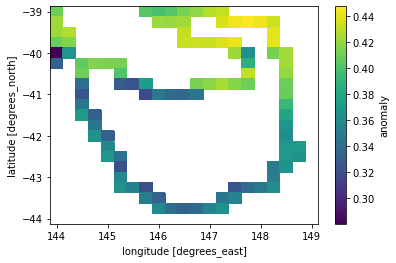

In [45]:
cor_test.plot()

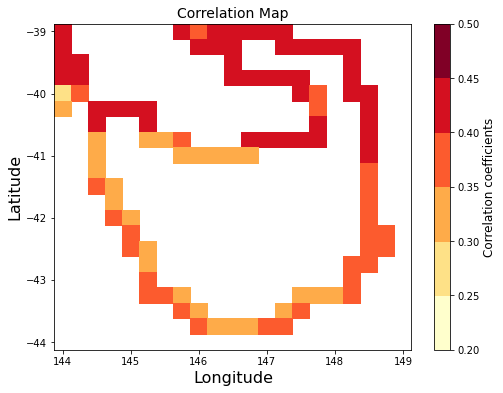

In [51]:
fig, ax = plt.subplots(figsize=(8,6)) 
ploteo=cor_test.plot(
    cmap=plt.cm.get_cmap('YlOrRd', 6),  
    vmin=0.2, vmax=0.5, # Minimum and maximum values of the colormap
)
ploteo.colorbar.ax.set_ylabel('Correlation coefficients',fontsize=12)
plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude', fontsize=16)
plt.title('Correlation Map', fontsize=14)
plt.show()